# ДЗ 4
Тема “Обучение без учителя”

## Задание 1
    Импортируйте библиотеки pandas, numpy и matplotlib.
    Загрузите "Boston House Prices dataset" из встроенных наборов
    данных библиотеки sklearn.
    Создайте датафреймы X и y из этих данных.
    Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
    с помощью функции train_test_split так, чтобы размер тестовой выборки
    составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
    Масштабируйте данные с помощью StandardScaler.
    Постройте модель TSNE на тренировочный данных с параметрами:
    n_components=2, learning_rate=250, random_state=42.
    Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn as skl
import sklearn.metrics as metrics
import sklearn.preprocessing as skl_pp
import sklearn.model_selection as skl_ms
import sklearn.cluster as skl_cl
import sklearn.manifold as skl_manifold
# import sklearn.decomposition as skl_decomp

In [3]:
import sys
sys.path.append(r"..")

import tools

In [4]:
df = pd.read_csv(r"..\hw3\boston_house_prices.csv", header=1)
df.columns = df.columns.str.lower()
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Разделение на признаки и целевые признаки:

In [5]:
X = df.drop('medv', axis=1)
y = df.medv

Разделение на обучающую и тестовую выборки:

In [6]:
xTrain, xTest, yTrain, yTest = skl_ms.train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

Масштабирование признаков:

In [7]:
scaler = skl_pp.StandardScaler()

xTrainSc = pd.DataFrame(scaler.fit_transform(xTrain), columns=xTrain.columns)
xTestSc = pd.DataFrame(scaler.transform(xTest), columns=xTest.columns)

Диаграмма на основе уменьшенной размерности методом TSNE:

<Figure size 800x700 with 0 Axes>

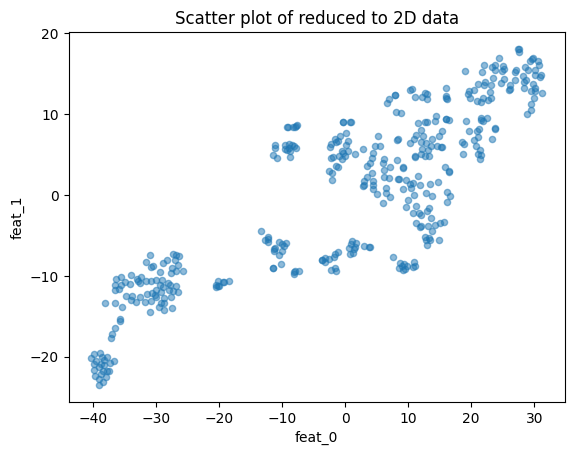

In [8]:
tools.scPlot2D(xTrainSc, method="tsne", learning_rate=250, random_state=42)

## Задание 2
    С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
    используйте все признаки из датафрейма X_train.
    Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
    Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
    и раскрасьте точки из разных кластеров разными цветами.
    Вычислите средние значения price и CRIM в разных кластерах.

Формирование кластеров для обучающей выборки методом kmeans:

In [27]:
kmeansCl = skl_cl.KMeans(n_clusters=3, max_iter=100, random_state=42)

kmeansLabels = kmeansCl.fit_predict(xTrainSc)

Диаграмма на основе уменьшенной размерности методом TSNE с учётом распределения по кластерам:

<Figure size 1000x700 with 0 Axes>

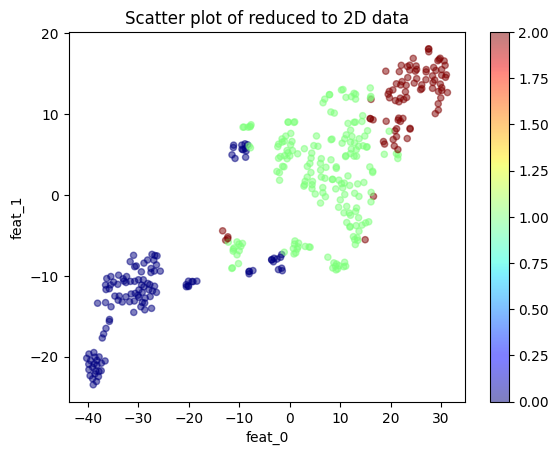

In [28]:
tools.scPlot2D(xTrainSc, method="tsne", labels=kmeansLabels, learning_rate=250, random_state=42)

Расчёт среднего по crim и medv с группировкой по кластерам для обучающей выборки:

In [81]:
# Формируем Series с учётом порядка следования индексов в обучающей выборке
trainCl = pd.Series(kmeansLabels, index=xTrain.index, name="cluster")

# Состыковываем обучающую выборку с серией признака кластеров и ценой, и рассчитываем средние
m1 = pd.concat((xTrain, yTrain), axis=1).join(trainCl).groupby('cluster')[['crim', 'medv']].mean()
m1

,crim,medv
cluster,,
0,10.797028,16.165354
1,0.421660,24.958115
2,0.073566,27.788372


## *Задание 3
    Примените модель KMeans, построенную в предыдущем задании,
    к данным из тестового набора.
    Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

Расчёт среднего по crim и medv с группировкой по кластерам для тестовой выборки:

In [80]:
# Формируем Series с учётом порядка следования индексов в тестовой выборке
testCl = pd.Series(kmeansCl.predict(xTestSc), index=xTest.index, name="cluster")

# Состыковываем обучающую выборку с серией признака кластеров и ценой, и рассчитываем средние
m2 = pd.concat((xTest, yTest), axis=1).join(testCl).groupby('cluster')[['crim', 'medv']].mean()
m2

,crim,medv
cluster,,
0,10.165531,16.437143
1,0.266079,21.860784
2,0.062060,31.350000


Расчёт средних по всему набору данных:

In [82]:
df.join(pd.concat((trainCl, testCl))).groupby('cluster')[['crim', 'medv']].mean()

,crim,medv
cluster,,
0,10.660594,16.224074
1,0.388872,24.305372
2,0.071761,28.347059


Проверка по результатам по отдельным выборкам. Точность не высока (((

In [84]:
(m1 * xTrain.shape[0] + m2 * xTest.shape[0]) / X.shape[0]

,crim,medv
cluster,,
0,10.669731,16.220142
1,0.390298,24.333752
2,0.071246,28.506329
